In [1]:
import os
os.chdir("AML/")

In [2]:
import pandas as pd
import numpy as np
import chardet
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt

pd.read_csv('Iris.csv', encoding = 'Latin-1')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
with open("Iris.csv", 'rb') as f:
    result = chardet.detect(f.read()) 

print(result['encoding'])
df_raw = pd.read_csv('Iris.csv', encoding=result['encoding'])

#Quantifying Labels
df_raw['Species'] = df_raw['Species'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})
df = df_raw.loc[:,'SepalLengthCm':'PetalWidthCm']
labels = df_raw.loc[:,'Species']
df_raw.head()

ascii


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 0)
clusters = kmeans.fit_predict(df)
kmeans.cluster_centers_.shape

(3, 4)

In [5]:
from scipy.stats import mode

labels_train = np.zeros_like(clusters)
for i in range(5):
    mask = (clusters == i)
    labels_train[mask] = mode(labels[mask])[0]

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, labels_train)

0.8933333333333333

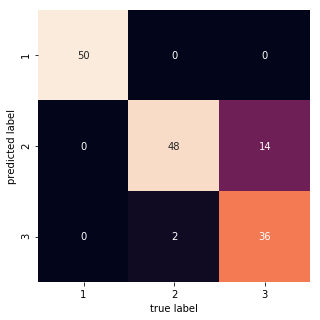

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(labels, labels_train)
plt.figure(figsize = (5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= range(1,4),
            yticklabels= range(1,4))
plt.xlabel('true label')
plt.ylabel('predicted label');

In [8]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
iris_proj = tsne.fit_transform(df)

# Compute the clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(iris_proj)

# Permute the labels
pred_labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    pred_labels[mask] = mode(labels[mask])[0]

# Compute the accuracy
accuracy_score(labels, pred_labels)

0.9066666666666666

**We see an increase in accuracy after reducing the components to 2 using t-SNE.**

In [9]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.manifold import TSNE

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

ready


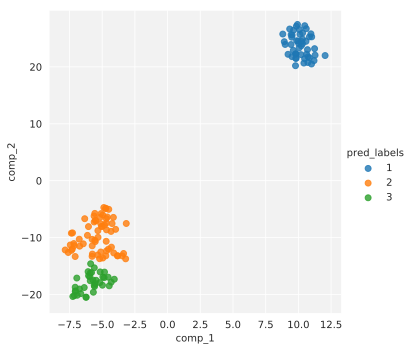

In [10]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(iris_proj)
proj.columns = ["comp_1", "comp_2"]
proj["pred_labels"] = pred_labels
sns.lmplot("comp_1", "comp_2", hue = "pred_labels", data = proj ,fit_reg=False)
print("ready")

In [11]:
from sklearn.metrics import silhouette_score
silhouette_score(df,pred_labels)

0.5539343898551249

**The silhoette score is moderately high, indicating a decent clustering.**